In [24]:
from google.colab import files
uploaded = files.upload()

Saving AC 1.1.jpg to AC 1.1.jpg
Saving AC 1.2.jpg to AC 1.2.jpg


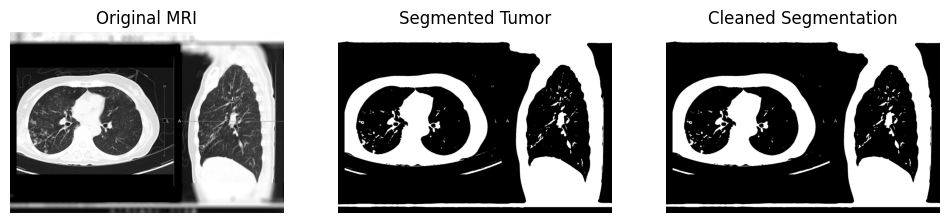

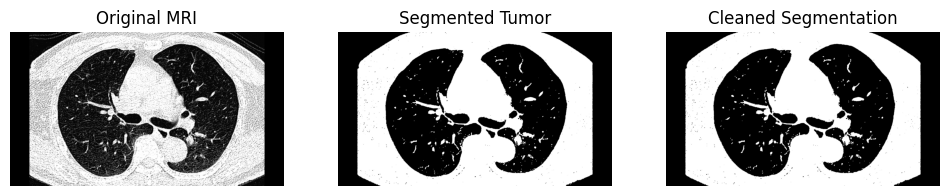

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

for filename in uploaded.keys():

    image = cv2.imread(filename)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Reduce noise
    blur = cv2.GaussianBlur(gray, (5,5), 0)

    # Automatic threshold
    _, binary = cv2.threshold(blur, 0, 255,
                              cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Morphological operation (clean small noise)
    kernel = np.ones((3,3), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

    # Display
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.imshow(gray, cmap='gray')
    plt.title("Original MRI")
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(binary, cmap='gray')
    plt.title("Segmented Tumor")
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(opening, cmap='gray')
    plt.title("Cleaned Segmentation")
    plt.axis('off')

    plt.show()